In [1]:
import pandas as pd
from graph_drawer import get_nx_representation
from graph_stats import compute_graph_statistics, draw_degree_dist
from dataset import PacketsDatapipe, get_labels

In [2]:
packet_list_dataset_location = r'App\src\build_release\own\packet_list_dataset'
size_delay_dataset_location = r'App\src\build_release\own\size_delay_dataset'
dataset = PacketsDatapipe(size_delay_dataset_location, batch_size=1, balanced=True)[0]

0 (idle): 3894
1 (web): 3224
2 (video): 86477
3 (voip): 1778
4 (file-transfer): 13012
5 (online-game): 6984
Balanced to: 1778


In [3]:
graph_statistics_list = []

# Compute statistics for each graph
for index, graph in enumerate(dataset):
    label = graph.y.item()
    try:
        graph_stats = compute_graph_statistics(get_nx_representation(graph.x, graph.edge_index))
        graph_stats['graph_id'] = index
        graph_stats['label'] = label
        graph_stats['label_name'] = get_labels()[label]

    except:
        graph_stats = compute_graph_statistics(get_nx_representation(graph.x, graph.edge_index))
    else:
        graph_statistics_list.append(graph_stats)
    
    print(f'Processing: {index+1}', end='\r')

# Create a DataFrame from the list of statistics
df_stats = pd.DataFrame(graph_statistics_list)

In [4]:
# get rows for every graph label
stats_display = df_stats.groupby('label', group_keys=False).apply(lambda group : group.head(3))

In [5]:
stats_display.columns

Index(['NumNodes', 'NumEdges', 'Density', 'AverageDegree',
       'DegreeDistribution', 'AverageClusteringCoefficient',
       'AverageShortestPathLength', 'DegreeCentrality', 'ClosenessCentrality',
       'BetweennessCentrality', 'Eccentricity', 'Diameter', 'Radius',
       'graph_id', 'label', 'label_name'],
      dtype='object')

In [6]:
print(stats_display.drop(columns=['label_name', 'DegreeDistribution', 'graph_id', 'DegreeCentrality', 'ClosenessCentrality', 'BetweennessCentrality', 'Eccentricity']).to_latex(index=False, float_format='%.2f'))

\begin{tabular}{rrrrrrrrr}
\toprule
NumNodes & NumEdges & Density & AverageDegree & AverageClusteringCoefficient & AverageShortestPathLength & Diameter & Radius & label \\
\midrule
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 0 \\
3 & 5 & 0.83 & 3.33 & 0.83 & 1.17 & 2.00 & 1.00 & 0 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 0 \\
4 & 12 & 1.00 & 6.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1 \\
3 & 6 & 1.00 & 4.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 1 \\
5 & 14 & 0.70 & 5.60 & 0.77 & 1.30 & 2.00 & 1.00 & 2 \\
3 & 6 & 1.00 & 4.00 & 1.00 & 1.00 & 1.00 & 1.00 & 2 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 2 \\
3 & 6 & 1.00 & 4.00 & 1.00 & 1.00 & 1.00 & 1.00 & 3 \\
3 & 6 & 1.00 & 4.00 & 1.00 & 1.00 & 1.00 & 1.00 & 3 \\
3 & 6 & 1.00 & 4.00 & 1.00 & 1.00 & 1.00 & 1.00 & 3 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 4 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 4 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00

In [15]:
graph_describes_stats = df_stats.drop(columns=['label', 'DegreeDistribution', 'graph_id', 'DegreeCentrality', 'ClosenessCentrality', 'BetweennessCentrality', 'Eccentricity']).groupby('label_name').describe().drop('count', level=1, axis=1).transpose()

In [16]:
graph_describes_stats

label_name                         file-transfer       idle  online-game  \
NumNodes                     mean       2.018560   2.319460     6.184477   
                             std        0.246971   0.685301     1.383538   
                             min        0.000000   2.000000     2.000000   
                             25%        2.000000   2.000000     5.000000   
                             50%        2.000000   2.000000     6.000000   
                             75%        2.000000   2.000000     7.000000   
                             max        7.000000  10.000000     9.000000   
NumEdges                     mean       2.106299   3.320585    29.670416   
                             std        1.386670   3.247723    12.011270   
                             min        0.000000   2.000000     2.000000   
                             25%        2.000000   2.000000    20.000000   
                             50%        2.000000   2.000000    29.000000   
                             75%        2.000000   2.000000    38.000000   
                             max       36.000000  65.000000    66.000000   
Density                      mean       0.997689   0.982371     0.892258   
                             std        0.042486   0.056046     0.081223   
                             min        0.000000   0.583333     0.642857   
                             25%        1.000000   1.000000     0.833333   
                             50%        1.000000   1.000000     0.900000   
                             75%        1.000000   1.000000     0.966667   
                             max        1.000000   1.000000     1.000000   
AverageDegree                mean       2.039785   2.538433     9.130471   
                             std        0.411807   1.118920     2.211403   
                             min        2.000000   2.000000     2.000000   
                             25%        2.000000   2.000000     8.000000   
                             50%        2.000000   2.000000     9.428571   
                             75%        2.000000   2.000000    10.571429   
                             max       10.285714  13.000000    14.666667   
AverageClusteringCoefficient mean       0.013502   0.206886     0.903546   
                             std        0.113394   0.388261     0.103411   
                             min        0.000000   0.000000     0.000000   
                             25%        0.000000   0.000000     0.866667   
                             50%        0.000000   0.000000     0.913464   
                             75%        0.000000   0.000000     0.956190   
                             max        1.000000   1.000000     1.000000   
AverageShortestPathLength    mean       1.000438   1.013227     1.094256   
                             std        0.007718   0.043384     0.074271   
                             min        1.000000   1.000000     1.000000   
                             25%        1.000000   1.000000     1.033333   
                             50%        1.000000   1.000000     1.095238   
                             75%        1.000000   1.000000     1.142857   
                             max        1.166667   1.277778     1.375000   
Diameter                     mean       1.003382   1.095374     1.788377   
                             std        0.058075   0.293815     0.441313   
                             min        1.000000   1.000000     1.000000   
                             25%        1.000000   1.000000     2.000000   
                             50%        1.000000   1.000000     2.000000   
                             75%        1.000000   1.000000     2.000000   
                             max        2.000000   2.000000     4.000000   
Radius                       mean       1.000000   1.000000     1.000000   
                             std        0.000000   0.000000     0.000000   
                             min        1.000000

In [18]:
print(graph_describes_stats.to_latex(float_format='%.2f', escape=True, longtable=True))

\begin{longtable}{llrrrrrr}
\toprule
 & label_name & file-transfer & idle & online-game & video & voip & web \\
\midrule
\endfirsthead
\toprule
 & label_name & file-transfer & idle & online-game & video & voip & web \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
\multirow[t]{7}{*}{NumNodes} & mean & 2.02 & 2.32 & 6.18 & 3.80 & 2.98 & 4.68 \\
 & std & 0.25 & 0.69 & 1.38 & 1.32 & 0.28 & 2.42 \\
 & min & 0.00 & 2.00 & 2.00 & 0.00 & 2.00 & 2.00 \\
 & 25\% & 2.00 & 2.00 & 5.00 & 3.00 & 3.00 & 2.00 \\
 & 50\% & 2.00 & 2.00 & 6.00 & 4.00 & 3.00 & 4.00 \\
 & 75\% & 2.00 & 2.00 & 7.00 & 5.00 & 3.00 & 7.00 \\
 & max & 7.00 & 10.00 & 9.00 & 9.00 & 7.00 & 12.00 \\
\cline{1-8}
\multirow[t]{7}{*}{NumEdges} & mean & 2.11 & 3.32 & 29.67 & 10.88 & 5.85 & 19.05 \\
 & std & 1.39 & 3.25 & 12.01 & 8.01 & 1.78 & 18.64 \\
 & min & 0.00 & 2.00 & 2.00 & 0.00 & 2.00 & 2.00 \\
 & 25\% & 2.00 & 2.00 & 20.00 & 6.00 & 6.00 & 2.00 \\
 & 50\% & 2

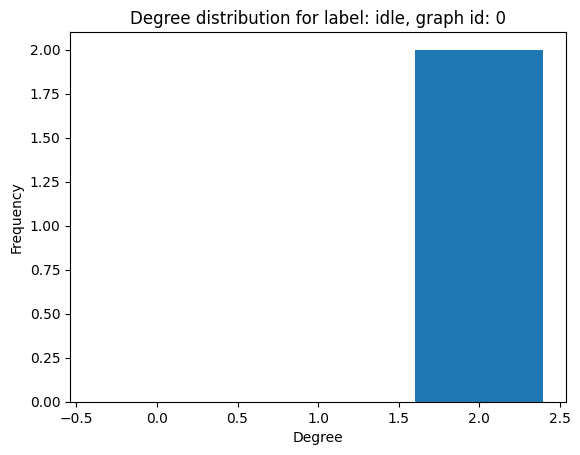

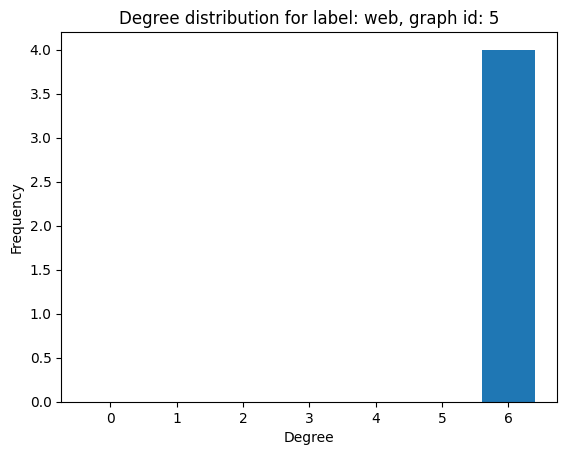

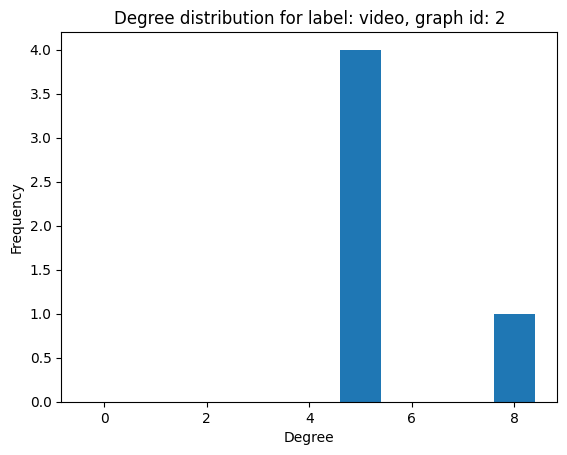

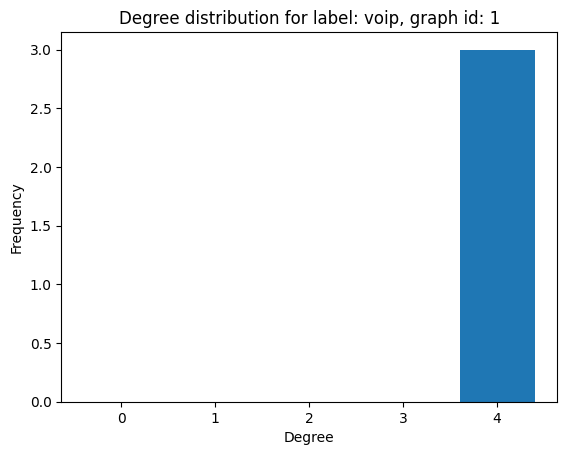

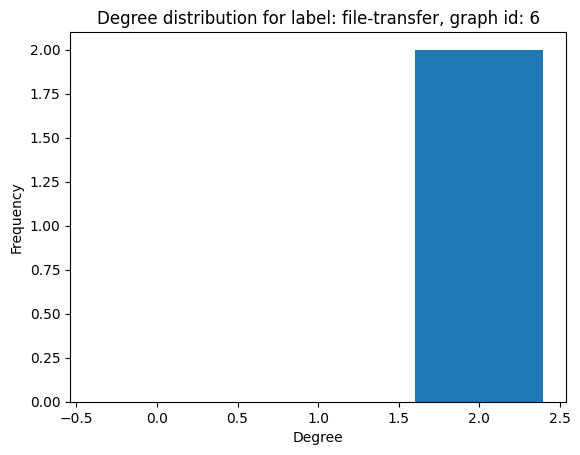

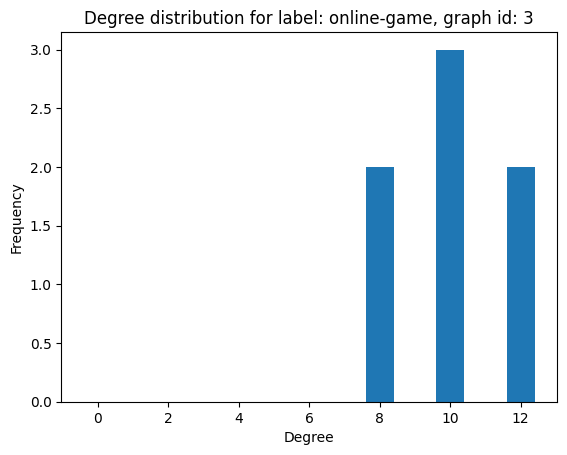

0    None
5    None
2    None
1    None
6    None
3    None
dtype: object

In [10]:

# draw degree distributons
df_stats.groupby('label', group_keys=False) \
.apply(lambda group : group.head(1)) \
.apply(lambda row : draw_degree_dist(row['DegreeDistribution'], f'Degree distribution for label: {get_labels()[row["label"]]}, graph id: {row["graph_id"]}'), axis=1)